In this code I read a grayscale image using OpenCV, converts it to grayscale, and displays it using Matplotlib

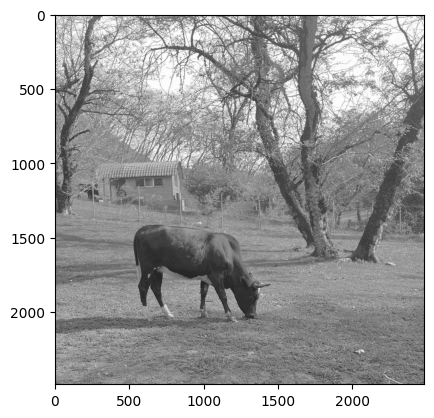

In [ ]:
import cv2
from PIL import Image
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

gray = cv2.imread('/content/drive/MyDrive/Computer_Vision/Sample.jpeg',cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(gray, cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

A

With Histogram function I tried to calculate the histogram of a grayscale image. in this code in two nested for-loop I increase the specific brightness amount each time there is one in the image gray scale.

In [ ]:
#my implementation
def Histogram(gray):
  histogram = np.zeros(256)
  num_rows, num_cols = gray.shape
  for i in range(num_rows):
    for j in range(num_cols):
      intensity = gray[i, j]
      histogram[intensity] += 1
  sum = np.sum(histogram)
  output = histogram
  return output

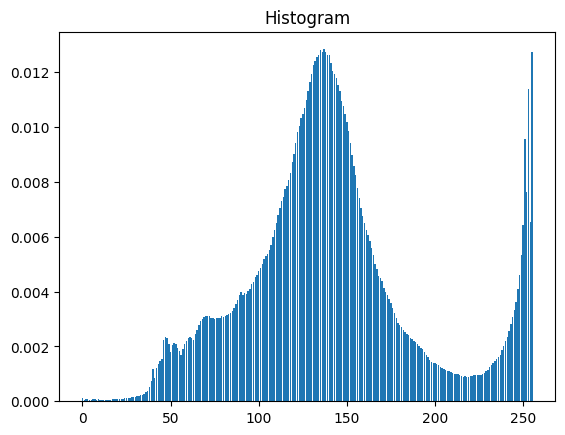

Contrast level: 0.012780425004756912


In [ ]:
histogram = Histogram(gray)
normalized_histogram = histogram / np.sum(histogram)

plt.bar(range(256), normalized_histogram.flatten())
plt.title('Histogram')
plt.show()
contrast = (normalized_histogram.max() - normalized_histogram.min())
print('Contrast level:', contrast)

And at the end of histogram implementation here is the result of it with cv2.calHist. Just to make sure if my implementation works correcly

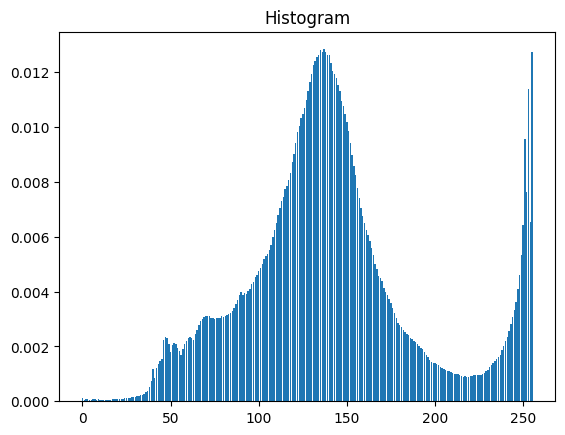

Contrast level: 0.012780424


In [ ]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
norm_hist = hist / np.sum(hist)

plt.bar(range(256), norm_hist.flatten())
plt.title('Histogram')
plt.show()

contrast = (norm_hist.max() - norm_hist.min())
print('Contrast level:', contrast)

B

In [ ]:
print(gray)

[[245 254 231 ... 250 236 235]
 [243 242 250 ... 243 249 251]
 [234 255 249 ... 250 247 249]
 ...
 [128 102  70 ... 133 135 133]
 [129 128 111 ... 124 127 146]
 [119 129 131 ... 113 119 157]]


The function takes a grayscale image and a brightness value as input, and returns the histogram-slided output image as output. with two nested for-loop i tried to add or subscribe specific mount of value to the brightness of pixels. If the result value was greater than 255 I just replace it with 255 and if it was less than 0 i replace it with 0.

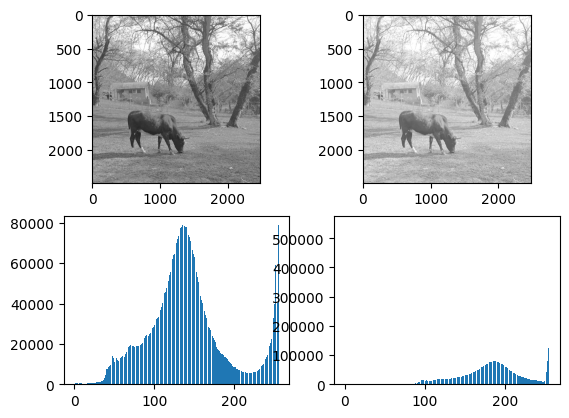

In [ ]:
def HistogramSliding(gray,brightness):
  num_rows , num_cols = gray.shape
  out = np.zeros((num_rows,num_cols))
  for i in range(num_rows):
    for j in range(num_cols):
      intensity = gray[i,j] + brightness
      if intensity > 255:
        out[i,j] = 255
      else:
        if intensity < 0:
          out[i,j] = 0
        else:
          out[i,j] = intensity

  return out

out = HistogramSliding(gray,50)

#print(out)
cv2.imwrite('/content/drive/MyDrive/Computer_Vision/Sample_2.jpeg',out)
gray_2 = cv2.imread('/content/drive/MyDrive/Computer_Vision/Sample_2.jpeg',cv2.IMREAD_GRAYSCALE)
image_2 = cv2.cvtColor(gray_2, cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image)
ax[0,1].imshow(image_2)
ax[1,0].bar(range(256), Histogram(gray).flatten())
ax[1,1].bar(range(256), Histogram(gray_2).flatten())
plt.show()


this is the second implementation of histogram sliding which i just apply the amount of brightness to image and in case if the value was greater than 255 or less than 0 it automatically calculate the mod of it

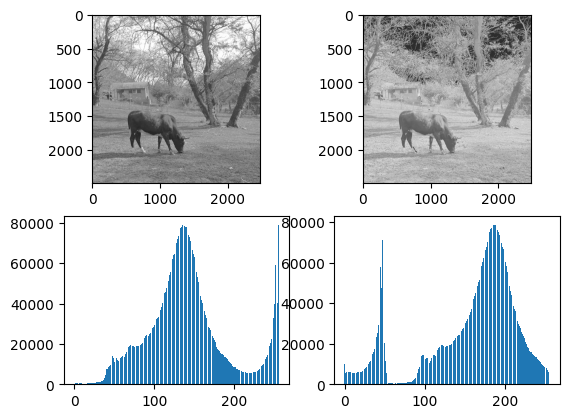

In [ ]:
def HistogramSliding1(gray,brightness):
  out = gray + brightness

  return out

out1 = HistogramSliding1(gray,50)

#print(out)
cv2.imwrite('/content/drive/MyDrive/Computer_Vision/Sample_21.jpeg',out1)
gray_21 = cv2.imread('/content/drive/MyDrive/Computer_Vision/Sample_21.jpeg',cv2.IMREAD_GRAYSCALE)
image_21 = cv2.cvtColor(gray_21, cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image)
ax[0,1].imshow(image_21)
ax[1,0].bar(range(256), Histogram(gray).flatten())
ax[1,1].bar(range(256), Histogram(gray_21).flatten())
plt.show()


C

In [ ]:
print(gray.size)

6175225


in this code i implement histogram equalization in four steps. at first i calculate running_sum array which is the sum of previous value of itself and value of just histogram diagram. in second step i divide the running_sum to num of total pixels. at next step i multiply running_sum to max brightness which is 255. then i map each pixel brightness to running_sum

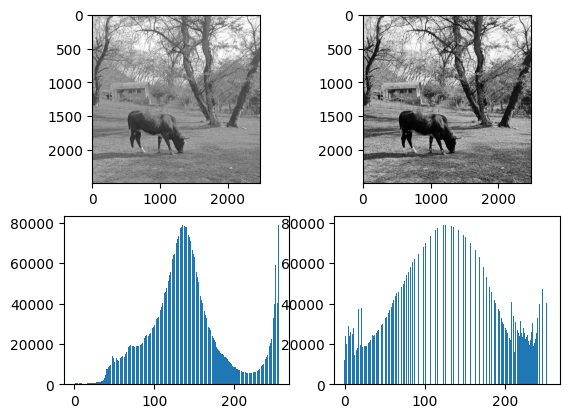

In [ ]:
hist = Histogram(gray)
#step one
running_sum = np.zeros(256)
for i in range(256):
  if i > 0:
    running_sum[i] = running_sum[i-1] + hist[i]
  else:
    running_sum[i] = hist[i]
#step two
num_pixel = running_sum[255]
running_sum = running_sum / num_pixel
#step three

for i in range(256):
  x = running_sum[i] * 255
  running_sum[i] = round(x)
running_sum = (running_sum).astype(int)
num_rows , num_cols = gray.shape
gray_3 = np.zeros((num_rows , num_cols))

for i in range(num_rows):
  for j in range(num_cols):
    gray_3[i,j] = running_sum[gray[i,j]]

gray_out = (gray_3).astype(int)

cv2.imwrite('/content/drive/MyDrive/Computer_Vision/Sample_3.jpeg',gray_3)
gray_3 = cv2.imread('/content/drive/MyDrive/Computer_Vision/Sample_3.jpeg',cv2.IMREAD_GRAYSCALE)
image_3 = cv2.cvtColor(gray_3, cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image)
ax[0,1].imshow(image_3)
ax[1,0].bar(range(256), Histogram(gray).flatten())
ax[1,1].bar(range(256), Histogram(gray_out).flatten())
plt.show()



20459.0


6175225


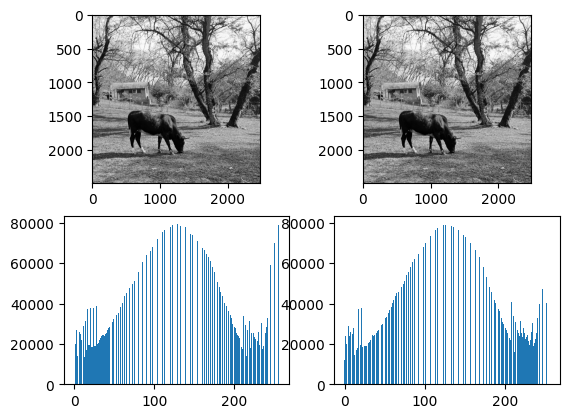

In [ ]:
equalized = cv2.equalizeHist(gray)
# print(equalized)
# print(gray_3)
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(cv2.cvtColor(equalized, cv2.IMREAD_GRAYSCALE))
ax[0,1].imshow(image_3)
ax[1,0].bar(range(256), Histogram(equalized).flatten())
ax[1,1].bar(range(256), Histogram(gray_out).flatten())
plt.show()


In [ ]:
print(gray_out)
print(equalized)

[[237 252 229 ... 243 231 231]
 [235 234 243 ... 235 241 245]
 [230 255 241 ... 243 239 241]
 ...
 [101  48  18 ... 116 123 116]
 [104 101  61 ...  90  98 157]
 [ 77 104 110 ...  65  77 183]]
[[237 252 229 ... 243 231 231]
 [235 234 243 ... 235 241 245]
 [230 255 241 ... 243 239 241]
 ...
 [101  48  18 ... 116 123 116]
 [104 101  61 ...  90  98 157]
 [ 77 104 110 ...  65  77 183]]
